# Introduction au Machine Learning

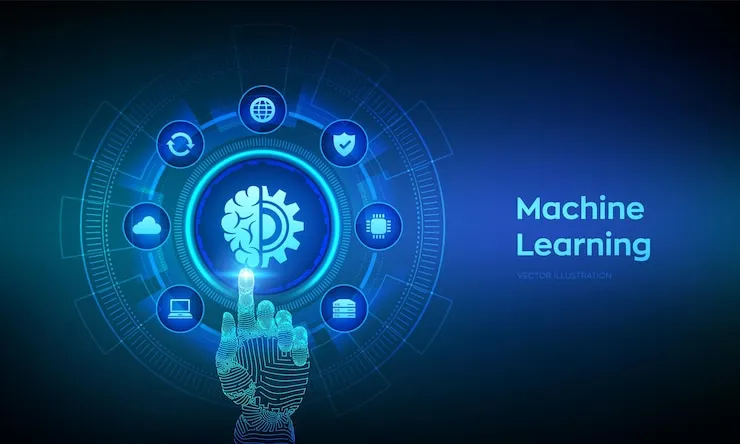

Le **machine learning** (ou **apprentissage automatique**) est une branche de l‚Äôintelligence artificielle (IA) qui permet √† des **ordinateurs d‚Äôapprendre √† partir des donn√©es**, sans √™tre explicitement programm√©s pour chaque t√¢che.

---

## üìö D√©finition simple

> Le machine learning consiste √† **entra√Æner un mod√®le math√©matique/statistique** √† partir de **donn√©es**, afin qu‚Äôil puisse **faire des pr√©dictions ou prendre des d√©cisions** sur de nouvelles donn√©es **jamais vues**.

---

## üéØ Objectif

> Apprendre un **mod√®le** √† partir de donn√©es pour **g√©n√©raliser** sur de nouveaux cas.

---

## üì¶ Exemples concrets

| Application               | Description                                                       |
| ------------------------- | ----------------------------------------------------------------- |
| üìß Filtrage d‚Äôe-mails     | Le mod√®le apprend √† classer un mail en "spam" ou "non-spam"       |
| üõí Recommandation         | Apprendre ce que tu aimes pour proposer des produits/films        |
| üè• Diagnostic m√©dical     | Pr√©dire si une tumeur est b√©nigne ou maligne                      |
| üìà Pr√©diction de prix     | Estimer le prix d‚Äôun logement en fonction de ses caract√©ristiques |
| üéôÔ∏è Reconnaissance vocale | Transformer la voix en texte gr√¢ce √† un mod√®le entra√Æn√©           |


# Types de Machine Learning

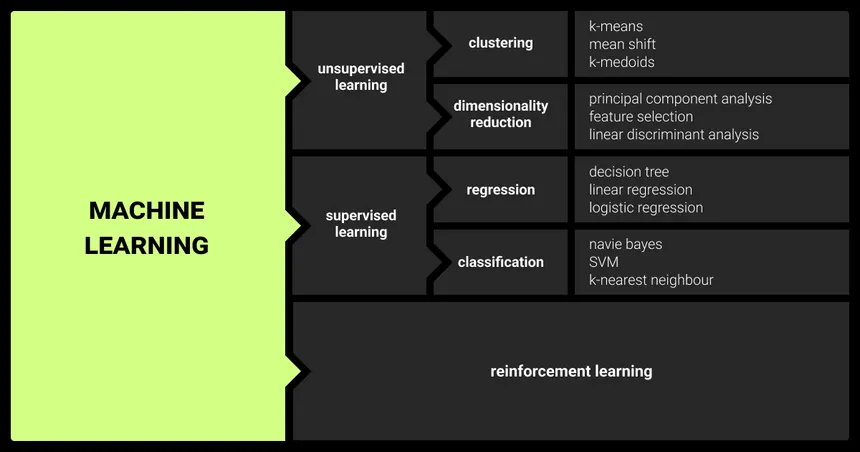

# Supervised Machine Learning

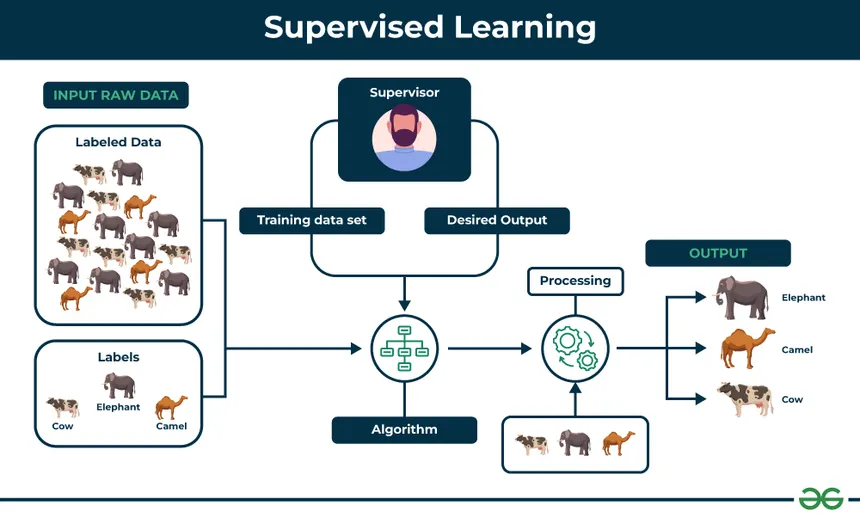
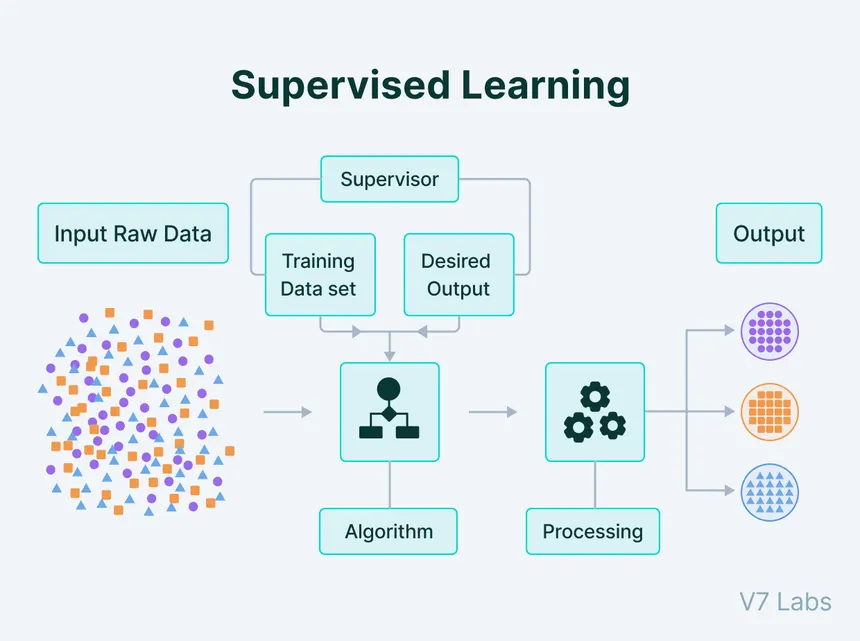

# Unsupervised Learning & Apprentissage Non Supervis√©

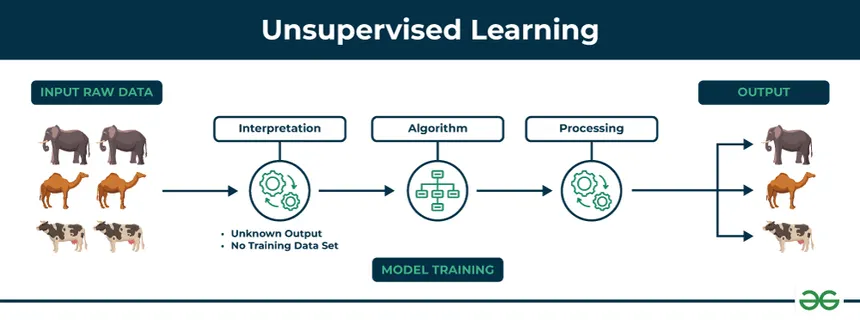
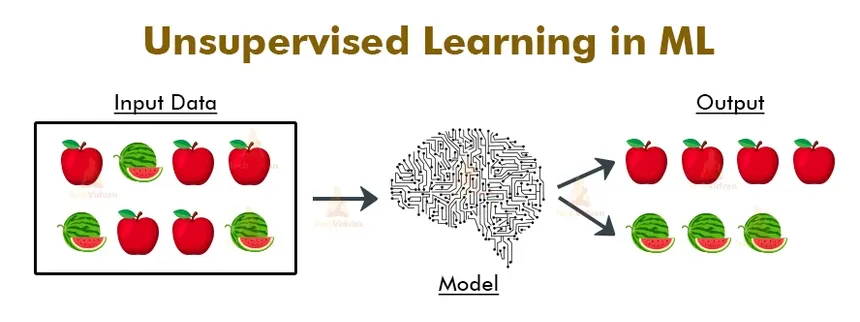
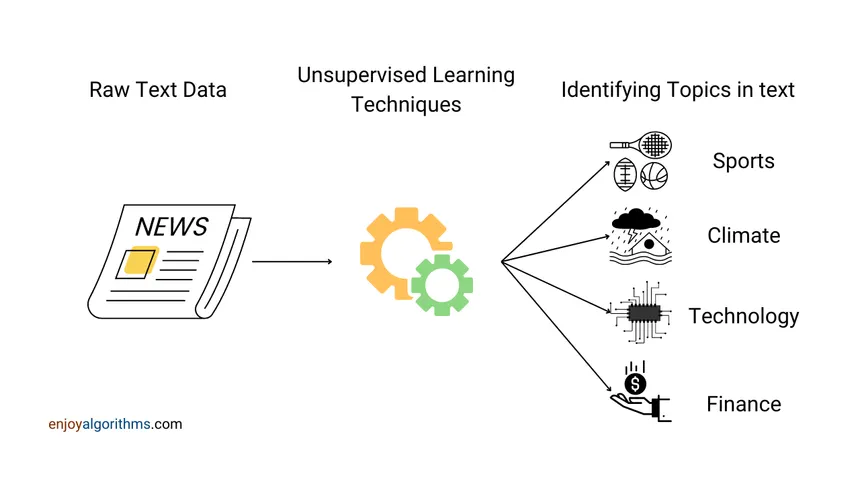

# Reinforcement Learning & Apprentissage par renforcement

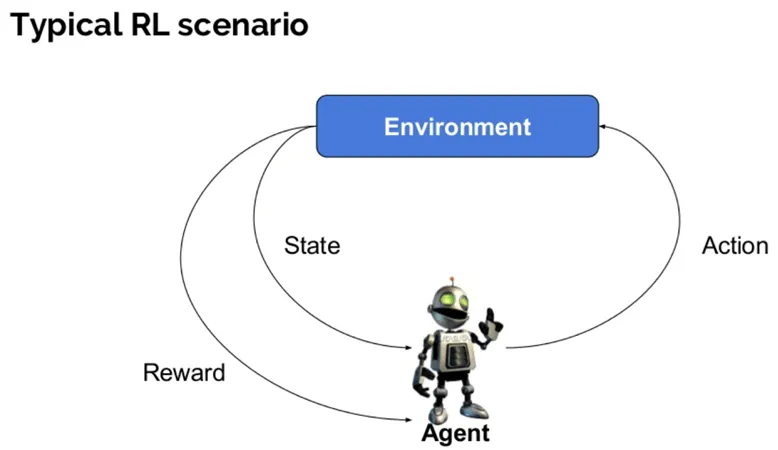
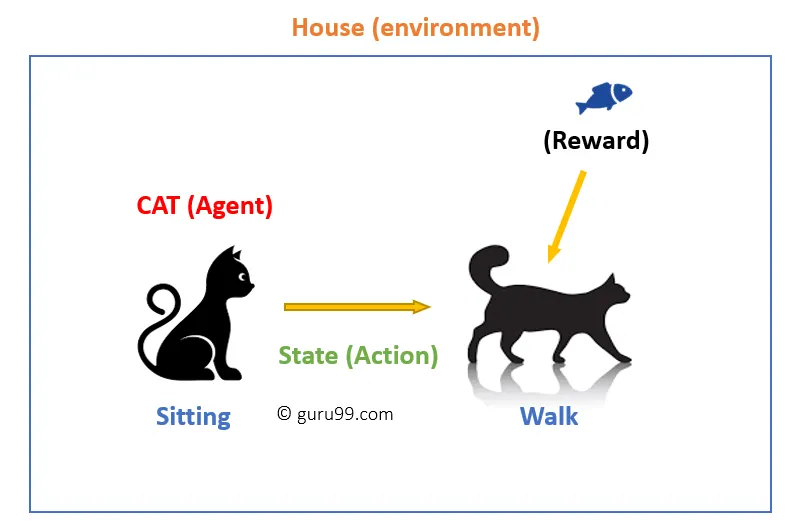

# Types de Machine Learning Supervis√©

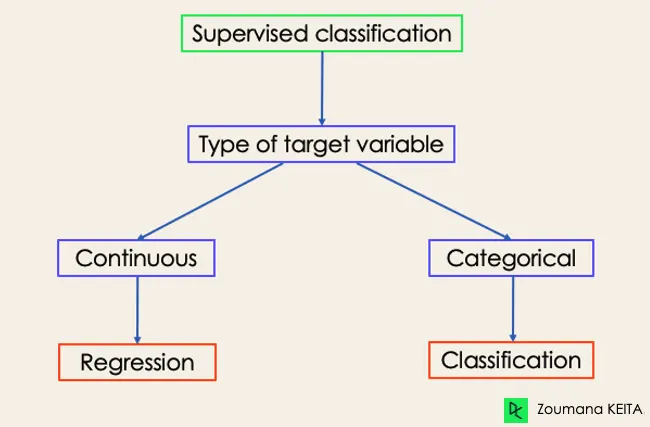

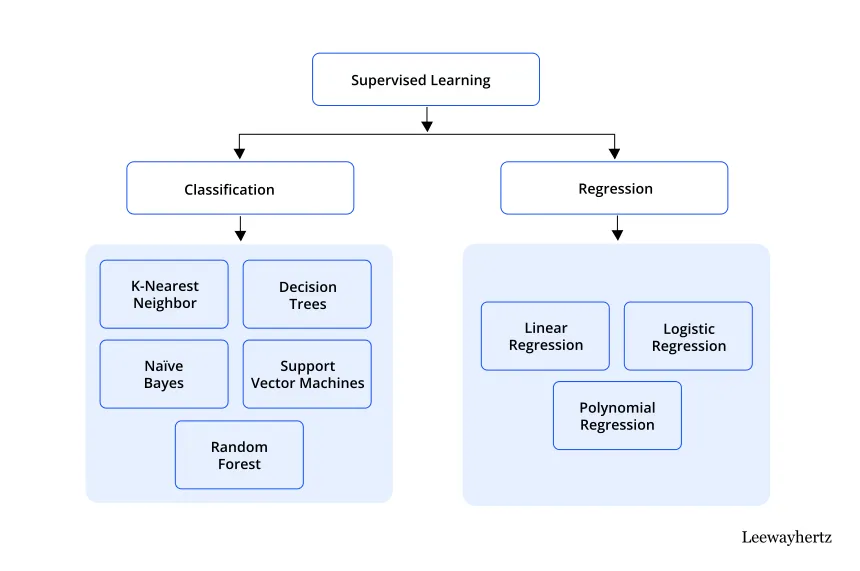


---

## ‚öôÔ∏è Comment √ßa fonctionne ? (Les √©tapes cl√©s)

1. **Collecte des donn√©es** (ex. : √¢ge, poids, taille, sexe‚Ä¶)
2. **Pr√©traitement** (nettoyage, normalisation, encodage‚Ä¶)
3. **Choix du mod√®le** (lin√©aire, arbre, r√©seau de neurones, etc.)
4. **Entra√Ænement** avec `.fit()` ‚Üí le mod√®le apprend des relations dans les donn√©es
5. **√âvaluation** avec `.score()` ou des m√©triques (MAE, RMSE, Accuracy‚Ä¶)
6. **Pr√©diction** avec `.predict()` sur de nouvelles donn√©es

---

## üß† Types d‚Äôapprentissage machine

| Type                 | Description                                                                                       | Exemples                           |
| -------------------- | ------------------------------------------------------------------------------------------------- | ---------------------------------- |
| **Supervis√©**        | Le mod√®le apprend √† partir de donn√©es **√©tiquet√©es** (input + output connus)                      | R√©gression, classification         |
| **Non supervis√©**    | Le mod√®le d√©couvre des **structures cach√©es** dans des donn√©es sans √©tiquette                     | Clustering, r√©duction de dimension |
| **Par renforcement** | Le mod√®le **interagit avec un environnement**, apprend par essais/erreurs (r√©compenses/punitions) | Jeux, robots, strat√©gie            |

---

## üìê Exemple ultra simple : r√©gression lin√©aire

Tu veux pr√©dire la **taille** d‚Äôune personne √† partir de son **poids**. Le mod√®le apprend une **droite** qui approxime cette relation :
`height ‚âà a * weight + b`

Ensuite, pour un nouveau poids, il **pr√©voit** la taille.

---

## üìå En r√©sum√©

| Terme                | Signification                                              |
| -------------------- | ---------------------------------------------------------- |
| **Machine Learning** | Apprentissage automatique √† partir de donn√©es              |
| **Mod√®le**           | Fonction math√©matique entra√Æn√©e pour faire des pr√©dictions |
| **Entra√Ænement**     | Phase d‚Äôapprentissage du mod√®le                            |
| **Pr√©diction**       | Utilisation du mod√®le sur de nouvelles donn√©es             |
| **G√©n√©ralisation**   | Capacit√© du mod√®le √† bien pr√©dire sur des cas jamais vus   |

---

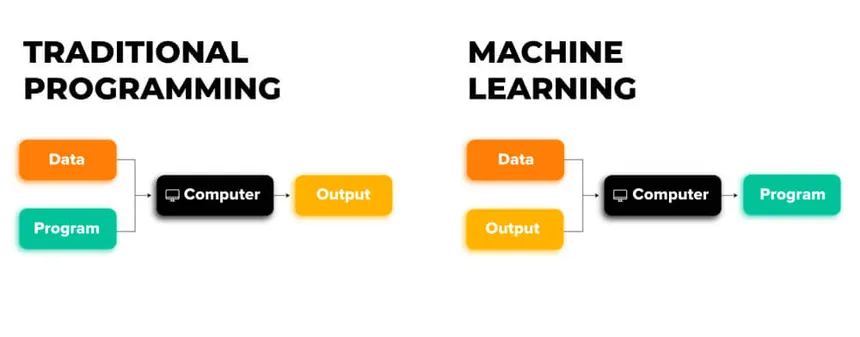

# Regression Lineaire 

## üß± 1. Chargement des biblioth√®ques et des donn√©es

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
data = pd.read_csv("data/age_vs_weight_vs_height_vs_gender.csv")

# Aper√ßu des donn√©es
data.head()

sex  age  height  weight  sort
0   f  147    59.5   101.0    14
1   m  160    59.3    78.5    93
2   f  148    59.0    95.0    61
3   m  149    57.0    92.0    63
4   m  156    61.5   108.5    28

## üìä 2. Analyse exploratoire

In [56]:
# Taille du dataset
print(f"Nombre de lignes : {data.shape[0]}, Nombre de colonnes : {data.shape[1]}")

display(data.info())
# Statistiques descriptives
display(data.describe())

Nombre de lignes : 237, Nombre de colonnes : 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     237 non-null    object 
 1   age     237 non-null    int64  
 2   height  237 non-null    float64
 3   weight  237 non-null    float64
 4   sort    237 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.4+ KB


None

age      height      weight        sort
count  237.000000  237.000000  237.000000  237.000000
mean   164.430380   61.364557  101.308017   52.459916
std     18.425767    3.945402   19.440698   28.989541
min    139.000000   50.500000   50.500000    0.000000
25%    148.000000   58.800000   85.000000   28.000000
50%    163.000000   61.500000  101.000000   55.000000
75%    178.000000   64.300000  112.000000   75.000000
max    250.000000   72.000000  171.500000   99.000000

In [57]:
data.duplicated().sum()

0

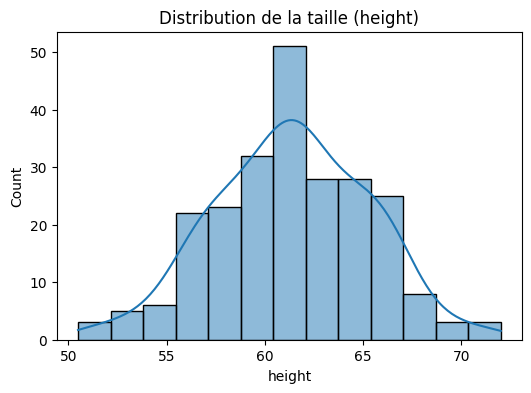

In [58]:
# Distribution de la variable cible
plt.figure(figsize=(6,4))
sns.histplot(data["height"], kde=True)
plt.title("Distribution de la taille (height)")
plt.show()

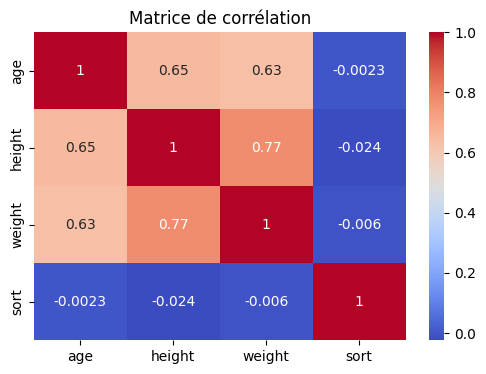

In [35]:
# Corr√©lation entre les variables num√©riques
data.drop(columns=["sex"])

plt.figure(figsize=(6,4))
sns.heatmap(data.drop(columns=["sex"]).corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corr√©lation")
plt.show()

## üîÑ 3. Pr√©paration des donn√©es

In [59]:
# Encodage binaire : f => 0, m => 1
data["sex"] = data["sex"].map({'f': 0, 'm': 1})
data["sex"].unique()

array([0, 1], dtype=int64)

In [60]:
X = data.drop(columns=["age", "sex", "height", "sort"])  # sort ne semble pas utile ici
Y = data["height"]

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (237, 1)
Y shape: (237,)


## üëÅÔ∏è 4. Visualisation 2D des relations

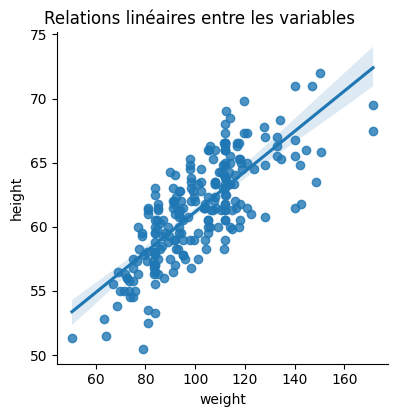

In [ ]:
# sns.pairplot(data, x_vars=["age", "weight", "sex"], y_vars="height", kind="reg", height=4
sns.pairplot(data, x_vars=["weight"], y_vars="height", kind="reg", height=4)
plt.suptitle("Relations lin√©aires entre les variables", y=1.02)
plt.show()

## ü§ñ 5. R√©gression lin√©aire simple (avec scikit-learn)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# S√©parer les donn√©es en train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


weight
0   101.0
1    78.5
2    95.0
3    92.0
4   108.5

In [62]:
# Y.head()

In [41]:
# Cr√©ation du mod√®le
model = LinearRegression()

# Entra√Ænement avec .fit()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
score = model.score(X_test, y_test)
score

0.36884787053658674

In [43]:
# Pr√©dictions avec .predict()
y_pred = model.predict(X_test)
y_pred

array([57.42869115, 63.20214795, 61.38763295, 59.90302977, 60.97524318,
       62.95471408, 59.73807387, 64.1918834 , 63.20214795, 64.02692749,
       57.34621319, 56.27399979, 60.89276523, 60.31541955, 57.67612501,
       62.95471408, 67.82091339, 61.88250068, 61.63506681, 64.93418499,
       58.66586046, 62.54232431, 63.20214795, 63.69701567, 56.85134547,
       56.6039116 , 58.00603683, 57.42869115, 63.44958181, 62.21241249,
       58.58338251, 64.1918834 , 58.58338251, 62.54232431, 69.22303861,
       60.3978975 , 68.1508252 , 58.58338251, 58.50090455, 63.20214795,
       58.58338251, 60.15046364, 63.53205976, 58.58338251, 58.58338251,
       58.58338251, 58.74833841, 59.98550773])

## üìà 6. Visualisation des pr√©dictions vs r√©els

In [64]:
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
# plt.xlabel("Valeurs r√©elles (height)")
# plt.ylabel("Valeurs pr√©dites")
# plt.title("Pr√©dictions vs R√©alit√©")
# plt.grid(True)
# plt.show()

## üìä 7. √âvaluation

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100

print(f"üìâ MAE : {mae:.2f}")
print(f"üìâ RMSE : {rmse:.2f}")
print(f"üìà R¬≤ Score : {r2:.4f}")
print(f"üìà MAPE : {mape:.4f}")


üìâ MAE : 2.14
üìâ RMSE : 2.66
üìà R¬≤ Score : 0.3688
üìà MAPE : 3.5223


Voici une version harmonis√©e, claire et p√©dagogique de ton texte, avec corrections et coh√©rence dans les valeurs et explications :

---

# Explication des principales m√©triques de performance en **r√©gression** : **MAE**, **RMSE**, **R¬≤** et **MAPE**

---

## 1. **MAE ‚Äî Mean Absolute Error (Erreur absolue moyenne)**

### üîπ D√©finition

Le MAE mesure **l‚Äôerreur moyenne absolue** entre les valeurs pr√©dites et les valeurs r√©elles. Il correspond √† l‚Äô**√©cart moyen** sans prendre en compte le signe des erreurs.

### üìê Formule

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$

* $y_i$ : valeur r√©elle
* $\hat{y}_i$ : valeur pr√©dite
* $n$ : nombre d‚Äôexemples

### üß† Interpr√©tation

> üìâ **MAE = 2.14 cm**

‚Üí En moyenne, le mod√®le se trompe de **2.14 cm** dans ses pr√©dictions de taille.

‚úÖ **Avantage** : tr√®s intuitif et interpr√©table dans l‚Äôunit√© de la variable cible.
‚ö†Ô∏è **Limite** : traite toutes les erreurs de fa√ßon √©gale, qu‚Äôelles soient petites ou grosses.

---

## 2. **RMSE ‚Äî Root Mean Squared Error (Erreur quadratique moyenne racine)**

### üîπ D√©finition

Le RMSE est la racine carr√©e de la moyenne des erreurs au carr√©. Il **p√©nalise davantage les grosses erreurs**, donnant plus de poids aux √©carts importants.

### üìê Formule

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

### üß† Interpr√©tation

> üìâ **RMSE = 2.66 cm**

‚Üí En moyenne, les erreurs sont d‚Äôenviron **2.66 cm**, avec une attention plus forte port√©e aux grosses erreurs.

‚úÖ **Avantage** : sensible aux grosses erreurs, utile pour juger la fiabilit√© globale.
‚ö†Ô∏è **Limite** : moins intuitif que le MAE car il amplifie les erreurs importantes.

---

## 3. **R¬≤ ‚Äî Coefficient de d√©termination**

### üîπ D√©finition

Le **R¬≤** mesure la part de la variance des donn√©es expliqu√©e par le mod√®le. C‚Äôest une mesure relative qui compare la performance du mod√®le √† celle d‚Äôun mod√®le na√Øf qui pr√©dit toujours la moyenne.

### üìê Formule

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

* $\bar{y}$ : moyenne des valeurs r√©elles
* Num√©rateur : erreur du mod√®le
* D√©nominateur : erreur du mod√®le na√Øf (moyenne constante)

### üß† Interpr√©tation

> üìà **R¬≤ = 0.3688 (36.88%)**

‚Üí Le mod√®le explique environ **36.88 %** de la variance des tailles des enfants.

üü¢ **Positif** : le mod√®le capte une part utile de l‚Äôinformation.
üî¥ **Limite** : beaucoup de variabilit√© reste inexpliqu√©e (bruit, variables manquantes, etc.).

---

## 4. **MAPE ‚Äî Mean Absolute Percentage Error (Erreur absolue moyenne en pourcentage)**

### üîπ D√©finition

Le MAPE mesure l‚Äôerreur moyenne **en pourcentage** par rapport aux valeurs r√©elles, ce qui est utile pour comparer la performance sur des √©chelles diff√©rentes.

### üìê Formule

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

### üß† Interpr√©tation

> üìà **MAPE = 3.688 %**

‚Üí En moyenne, les pr√©dictions s‚Äô√©cartent de **3.688 %** par rapport √† la vraie valeur.

‚úÖ **Avantage** : tr√®s intuitif, on comprend directement la marge d‚Äôerreur relative.
‚ö†Ô∏è **Limite** : tr√®s sensible aux petites valeurs r√©elles (division par des nombres proches de z√©ro).

---

## üìä R√©sum√© des m√©triques

| M√©trique | Valeur  | Interpr√©tation concr√®te                                          |
| -------- | ------- | ---------------------------------------------------------------- |
| **MAE**  | 2.14 cm | √âcart moyen absolu entre pr√©dictions et r√©alit√©                  |
| **RMSE** | 2.66 cm | √âcart moyen pond√©r√©, plus sensible aux grosses erreurs           |
| **R¬≤**   | 36.88 % | Part de la variance expliqu√©e par le mod√®le                      |
| **MAPE** | 3.688 % | √âcart moyen relatif en pourcentage par rapport √† la vraie valeur |

---

## üß≠ Que faire avec ces r√©sultats ?

* Le mod√®le n‚Äôest **pas catastrophique**, mais avec moins de 40 % de variance expliqu√©e, il reste **am√©liorable**.
* La MAPE √©lev√©e sugg√®re que les erreurs relatives restent importantes.
* Actions recommand√©es pour am√©liorer le mod√®le :

  * Ajouter des **variables explicatives** pertinentes (feature engineering).
  * Tester des **mod√®les non lin√©aires** (Random Forest, XGBoost, SVR, etc.).
  * V√©rifier la **qualit√© des donn√©es** (bruit, erreurs, valeurs aberrantes).


## üß† 8. Interpr√©tation des coefficients

In [79]:
coeffs = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})
print("Importance des variables dans le mod√®le :")
display(coeffs)

Importance des variables dans le mod√®le :


Variable  Coefficient
0   weight     0.164956

- f(x) = ax
- y = height = 0.164956*weight

## R√©capitulatif

| √âtape                | Fonction utilis√©e            |
| -------------------- | ---------------------------- |
| Chargement mod√®le    | `LinearRegression()`         |
| Entra√Ænement         | `.fit(X_train, y_train)`     |
| Pr√©diction           | `.predict(X_test)`           |
| Score de performance | `.score(X_test, y_test)`     |
| Erreurs MAE/RMSE/R¬≤  | `mean_absolute_error()` etc. |


# R√©gression Lin√©aire Multiple & Cross Validation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [80]:
# =============================================================================
# 1. CHARGEMENT ET PR√âPARATION DES DONN√âES
# =============================================================================
print("üîç √âTAPE 1: Chargement et exploration des donn√©es")
print("=" * 50)

# Lecture du fichier CSV
data = pd.read_csv("data/age_vs_weight_vs_height_vs_gender.csv")

# Aper√ßu des donn√©es
print("Aper√ßu des premi√®res lignes :")
display(data.head())
print(f"\nDimensions du dataset : {data.shape}")
print(f"Colonnes : {list(data.columns)}")

# Encodage binaire : f => 0, m => 1
data["sex"] = data["sex"].map({'f': 0, 'm': 1})
print(f"Valeurs uniques pour 'sex' apr√®s encodage : {data['sex'].unique()}")

# Pr√©paration des variables
X = data.drop(columns=["height", "sort"])  # Variables explicatives
Y = data["height"]  # Variable cible

print(f"\nüìä Dimensions finales :")
print(f"X (variables explicatives) : {X.shape}")
print(f"Y (variable cible) : {Y.shape}")


üîç √âTAPE 1: Chargement et exploration des donn√©es
Aper√ßu des premi√®res lignes :


sex  age  height  weight  sort
0   f  147    59.5   101.0    14
1   m  160    59.3    78.5    93
2   f  148    59.0    95.0    61
3   m  149    57.0    92.0    63
4   m  156    61.5   108.5    28


Dimensions du dataset : (237, 5)
Colonnes : ['sex', 'age', 'height', 'weight', 'sort']
Valeurs uniques pour 'sex' apr√®s encodage : [0 1]

üìä Dimensions finales :
X (variables explicatives) : (237, 3)
Y (variable cible) : (237,)



üé® √âTAPE 2: Visualisation des relations


<Figure size 1500x500 with 0 Axes>

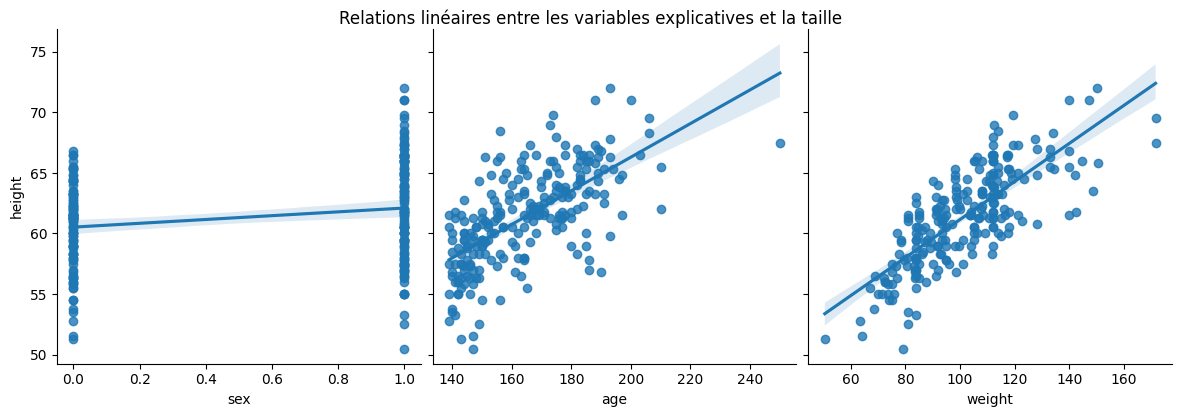

In [81]:
# =============================================================================
# 2. VISUALISATION DES RELATIONS
# =============================================================================
print("\nüé® √âTAPE 2: Visualisation des relations")
print("=" * 50)

plt.figure(figsize=(15, 5))
sns.pairplot(data, x_vars=["sex", "age", "weight"], y_vars="height", kind="reg", height=4)
plt.suptitle("Relations lin√©aires entre les variables explicatives et la taille", y=1.02)
plt.show()


In [76]:
# =============================================================================
# 3. APPROCHE TRADITIONNELLE : TRAIN/TEST SPLIT
# =============================================================================
print("\nüöÇ √âTAPE 3: Approche traditionnelle (Train/Test Split)")
print("=" * 50)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entra√Ænement du mod√®le
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Pr√©dictions
y_pred_simple = model_simple.predict(X_test)

# √âvaluation
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)


print(f"üìà R√©sultats avec Train/Test Split (80/20) :")
print(f"   MAE  : {mae_simple:.2f} cm")
print(f"   RMSE : {rmse_simple:.2f} cm")
print(f"   R¬≤   : {r2_simple:.4f}")
print(f"üìà MAPE : {mape:.4f}")



üöÇ √âTAPE 3: Approche traditionnelle (Train/Test Split)
üìà R√©sultats avec Train/Test Split (80/20) :
   MAE  : 2.14 cm
   RMSE : 2.66 cm
   R¬≤   : 0.3688
üìà MAPE : 3.5223


### Cross Validation

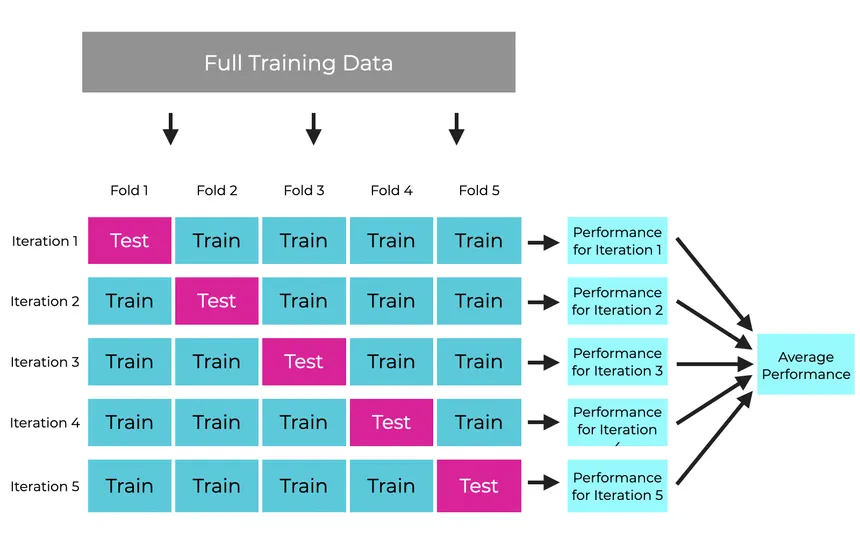

In [82]:
# =============================================================================
# 4. VALIDATION CROIS√âE 
# =============================================================================
print("\nüîÑ √âTAPE 4: Validation crois√©e (K-Fold)")
print("=" * 50)

# Mod√®le pour la validation crois√©e
model_cv = LinearRegression()

# Validation crois√©e avec diff√©rentes m√©triques
print("üéØ Validation crois√©e avec 5 plis (K=5) :")

# R¬≤ Score avec validation crois√©e
r2_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='r2')
print(f"   R¬≤ par pli : {[f'{score:.4f}' for score in r2_scores]}")
print(f"   R¬≤ moyen   : {r2_scores.mean():.4f} (¬±{r2_scores.std():.4f})")

# MAE avec validation crois√©e
mae_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores  # Conversion en valeurs positives
print(f"   MAE par pli : {[f'{score:.2f}' for score in mae_scores]}")
print(f"   MAE moyen   : {mae_scores.mean():.2f} (¬±{mae_scores.std():.2f}) cm")

# RMSE avec validation crois√©e
rmse_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -rmse_scores  # Conversion en valeurs positives
print(f"   RMSE par pli : {[f'{score:.2f}' for score in rmse_scores]}")
print(f"   RMSE moyen   : {rmse_scores.mean():.2f} (¬±{rmse_scores.std():.2f}) cm")



üîÑ √âTAPE 4: Validation crois√©e (K-Fold)
üéØ Validation crois√©e avec 5 plis (K=5) :
   R¬≤ par pli : ['0.5486', '0.5894', '0.6875', '0.6251', '0.7734']
   R¬≤ moyen   : 0.6448 (¬±0.0788)
   MAE par pli : ['2.01', '1.88', '1.90', '1.89', '1.46']
   MAE moyen   : 1.83 (¬±0.19) cm
   RMSE par pli : ['2.71', '2.38', '2.32', '2.30', '1.79']
   RMSE moyen   : 2.30 (¬±0.30) cm


In [83]:
# =============================================================================
# 5. VALIDATION CROIS√âE COMPL√àTE AVEC CROSS_VALIDATE
# =============================================================================
print("\nüìä √âTAPE 5: Validation crois√©e compl√®te")
print("=" * 50)

# Utilisation de cross_validate pour obtenir plusieurs m√©triques simultan√©ment
scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
cv_results = cross_validate(model_cv, X, Y, cv=5, scoring=scoring, return_train_score=True)

print("üîç R√©sultats d√©taill√©s de la validation crois√©e :")
print("\nScores de test (validation) :")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    if 'neg_' in metric:
        scores = -scores  # Conversion en valeurs positives
        metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    else:
        metric_name = metric.upper()
    
    print(f"   {metric_name:4s} : {scores.mean():.4f} (¬±{scores.std():.4f})")

print("\nScores d'entra√Ænement :")
for metric in scoring:
    scores = cv_results[f'train_{metric}']
    if 'neg_' in metric:
        scores = -scores
        metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    else:
        metric_name = metric.upper()
    
    print(f"   {metric_name:4s} : {scores.mean():.4f} (¬±{scores.std():.4f})")



üìä √âTAPE 5: Validation crois√©e compl√®te
üîç R√©sultats d√©taill√©s de la validation crois√©e :

Scores de test (validation) :
   R2   : 0.6448 (¬±0.0788)
   MEAN ABSOLUTE ERROR : 1.8273 (¬±0.1890)
   ROOT MEAN SQUARED ERROR : 2.3015 (¬±0.2951)

Scores d'entra√Ænement :
   R2   : 0.6587 (¬±0.0196)
   MEAN ABSOLUTE ERROR : 1.8249 (¬±0.0511)
   ROOT MEAN SQUARED ERROR : 2.2970 (¬±0.0699)


# Model Selection

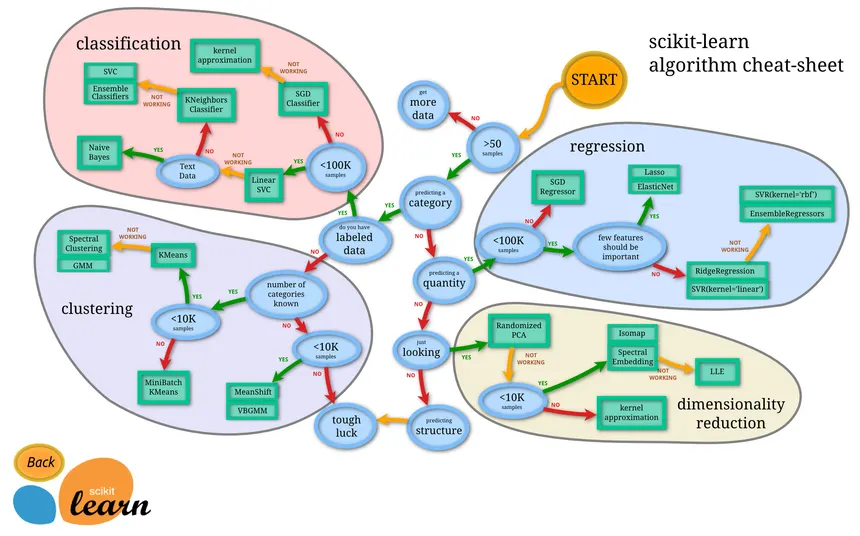

# Hyperparametrage avec Validation_curve et GridsearchCV

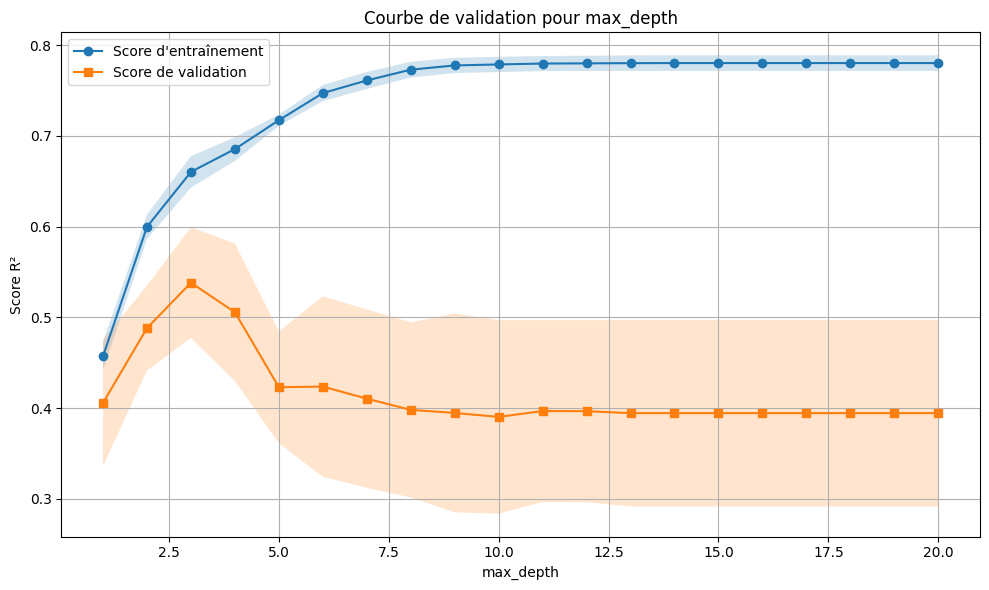

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Exemple : pour un mod√®le type arbre
param_name = 'max_depth'
param_range = np.arange(1, 21)  # de 1 √† 20

train_scores, test_scores = validation_curve(
    model_cv, X, Y,
    param_name=param_name,
    param_range=param_range,
    scoring='r2',  # ou 'neg_mean_absolute_error' selon le besoin
    cv=5,
    n_jobs=-1
)

# Moyenne et √©cart-type pour chaque valeur de l'hyperparam√®tre
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# üìà Trac√©
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Score d'entra√Ænement", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(param_range, test_mean, label="Score de validation", marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title(f"Courbe de validation pour {param_name}")
plt.xlabel(param_name)
plt.ylabel("Score R¬≤")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


# Learning_curve()


üìà Courbe d'apprentissage


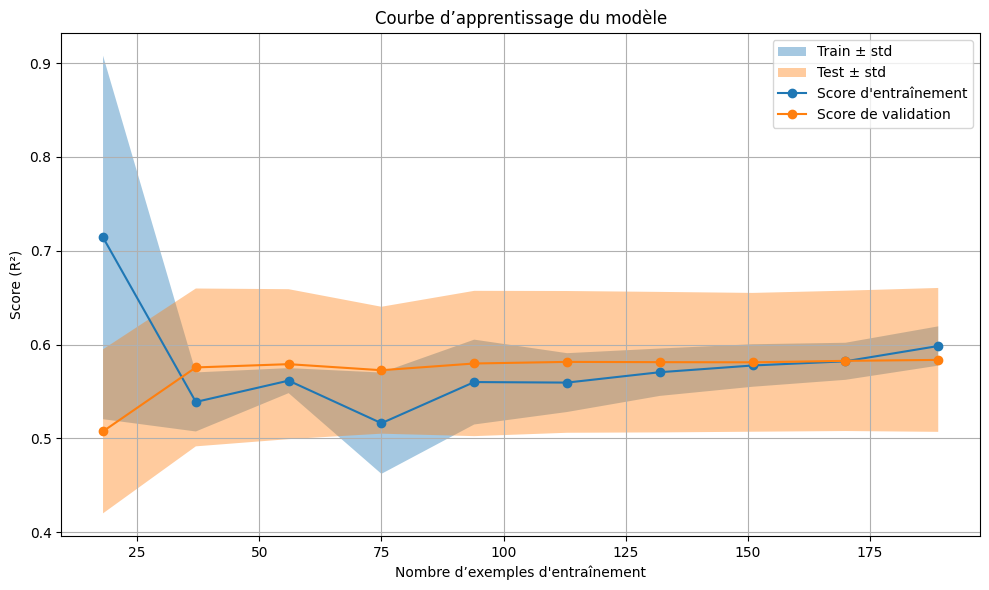

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

print("\nüìà Courbe d'apprentissage")
print("=" * 50)

# Choisir la m√©trique principale (ex: 'r2')
scoring = 'r2'

train_sizes, train_scores, test_scores = learning_curve(
    model_cv,
    X, Y,
    cv=5,
    scoring=scoring,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=False,
    n_jobs=-1
)

# Moyenne et √©cart-type
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# üìä Trac√© de la courbe
plt.figure(figsize=(10, 6))
plt.title("Courbe d‚Äôapprentissage du mod√®le")
plt.xlabel("Nombre d‚Äôexemples d'entra√Ænement")
plt.ylabel("Score (R¬≤)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.4, label="Train ¬± std")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.4, label="Test ¬± std")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score d'entra√Ænement")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de validation")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [21]:
# =============================================================================
# 6. COMPARAISON ET ANALYSE
# =============================================================================
print("\n‚öñÔ∏è √âTAPE 6: Comparaison des approches")
print("=" * 50)

print("üìà COMPARAISON DES R√âSULTATS :")
print(f"{'M√©thode':<25} {'R¬≤':<10} {'MAE (cm)':<12} {'RMSE (cm)':<12}")
print("-" * 60)
print(f"{'Train/Test Split':<25} {r2_simple:<10.4f} {mae_simple:<12.2f} {rmse_simple:<12.2f}")
print(f"{'Validation Crois√©e':<25} {r2_scores.mean():<10.4f} {mae_scores.mean():<12.2f} {rmse_scores.mean():<12.2f}")



‚öñÔ∏è √âTAPE 6: Comparaison des approches
üìà COMPARAISON DES R√âSULTATS :
M√©thode                   R¬≤         MAE (cm)     RMSE (cm)   
------------------------------------------------------------
Train/Test Split          0.4411     2.06         2.50        
Validation Crois√©e        0.6448     1.83         2.30        


In [ ]:
# =============================================================================
# 7 MOD√àLE FINAL ET COEFFICIENTS
# =============================================================================
print("\nüéØ √âTAPE 8: Mod√®le final")
print("=" * 50)

# Entra√Ænement sur toutes les donn√©es pour le mod√®le final
model_final = LinearRegression()
model_final.fit(X, Y)

print("üìã Coefficients du mod√®le final :")
feature_names = X.columns
coefficients = model_final.coef_
intercept = model_final.intercept_

print(f"   Ordonn√©e √† l'origine : {intercept:.2f} cm")
for feature, coef in zip(feature_names, coefficients):
    print(f"   {feature:<8s} : {coef:>8.2f} cm")

print(f"\nüîç Interpr√©tation :")
print(f"   - Une diff√©rence de sexe (m vs f) change la taille de {coefficients[0]:.1f} cm")
print(f"   - Chaque ann√©e d'√¢ge change la taille de {coefficients[1]:.2f} cm")
print(f"   - Chaque kg de poids change la taille de {coefficients[2]:.2f} cm")



üéØ √âTAPE 8: Mod√®le final
üìã Coefficients du mod√®le final :
   Ordonn√©e √† l'origine : 39.01 cm
   sex      :     1.03 cm
   age      :     0.06 cm
   weight   :     0.12 cm

üîç Interpr√©tation :
   - Une diff√©rence de sexe (m vs f) change la taille de 1.0 cm
   - Chaque ann√©e d'√¢ge change la taille de 0.06 cm
   - Chaque kg de poids change la taille de 0.12 cm


**height = 1.03*sex + 0.06*age + 0.12*weight + 39.01**

In [24]:
# =============================================================================
# 9. POURQUOI LA VALIDATION CROIS√âE EST IMPORTANTE
# =============================================================================
print("\nüí° √âTAPE 9: Pourquoi utiliser la validation crois√©e ?")
print("=" * 50)

print("""
üéØ AVANTAGES DE LA VALIDATION CROIS√âE :

1. **Utilisation optimale des donn√©es** :
   - Toutes les donn√©es servent √† la fois pour l'entra√Ænement ET la validation
   - Pas de "gaspillage" de donn√©es dans un seul ensemble de test

2. **Estimation plus robuste des performances** :
   - Moyenne sur plusieurs divisions diff√©rentes des donn√©es
   - Estimation de la variabilit√© des performances (√©cart-type)

3. **D√©tection du surapprentissage** :
   - Comparaison entre scores d'entra√Ænement et de validation
   - Grande diff√©rence = possible surapprentissage

4. **Confiance dans les r√©sultats** :
   - Intervalle de confiance gr√¢ce √† l'√©cart-type
   - Performances moins d√©pendantes d'une division particuli√®re

üìä Dans notre cas :
   - Le mod√®le est stable (faible √©cart-type)
   - Pas de surapprentissage apparent
   - Performance coh√©rente sur diff√©rents sous-ensembles
""")


üí° √âTAPE 9: Pourquoi utiliser la validation crois√©e ?

üéØ AVANTAGES DE LA VALIDATION CROIS√âE :

1. **Utilisation optimale des donn√©es** :
   - Toutes les donn√©es servent √† la fois pour l'entra√Ænement ET la validation
   - Pas de "gaspillage" de donn√©es dans un seul ensemble de test

2. **Estimation plus robuste des performances** :
   - Moyenne sur plusieurs divisions diff√©rentes des donn√©es
   - Estimation de la variabilit√© des performances (√©cart-type)

3. **D√©tection du surapprentissage** :
   - Comparaison entre scores d'entra√Ænement et de validation
   - Grande diff√©rence = possible surapprentissage

4. **Confiance dans les r√©sultats** :
   - Intervalle de confiance gr√¢ce √† l'√©cart-type
   - Performances moins d√©pendantes d'une division particuli√®re

üìä Dans notre cas :
   - Le mod√®le est stable (faible √©cart-type)
   - Pas de surapprentissage apparent
   - Performance coh√©rente sur diff√©rents sous-ensembles



# üß† Mod√®le + pr√©dictions en validation crois√©e

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = LinearRegression()
y_pred = cross_val_predict(model, X, Y, cv=5)

# Calcul des m√©triques
mae = mean_absolute_error(Y, y_pred)
rmse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"üìâ MAE : {mae:.2f}")
print(f"üìâ RMSE : {rmse:.2f}")
print(f"üìà R¬≤ : {r2:.4f}")

üìâ MAE : 1.83
üìâ RMSE : 5.39
üìà R¬≤ : 0.6520


# üìà 1. Courbe des valeurs r√©elles vs. pr√©dictions

In [47]:
# plt.figure(figsize=(6,6))
# sns.scatterplot(x=Y, y=y_pred, alpha=0.7, color='teal')
# plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--r')  # diagonale id√©ale
# plt.xlabel("Valeurs r√©elles (height)")
# plt.ylabel("Pr√©dictions (height)")
# plt.title("üìä Pr√©dictions vs Valeurs r√©elles")
# plt.grid(True)
# plt.show()

‚û°Ô∏è Cette courbe montre √† quel point les pr√©dictions sont proches de la r√©alit√©.
Si les points sont proches de la diagonale rouge, le mod√®le est bon.

# üìâ 2. Graphique des r√©sidus (erreurs)

In [45]:
# residuals = Y - y_pred

# plt.figure(figsize=(6,4))
# sns.histplot(residuals, kde=True, color='orange', bins=30)
# plt.axvline(0, color='black', linestyle='--')
# plt.title("üìâ Distribution des r√©sidus")
# plt.xlabel("Erreur de pr√©diction (r√©sidu)")
# plt.ylabel("Fr√©quence")
# plt.grid(True)
# plt.show()


‚û°Ô∏è Ce graphique montre comment les erreurs sont r√©parties.
Un bon mod√®le aura des r√©sidus centr√©s autour de 0 et une forme en cloche (distribution normale).

# üìâ 3. Valeur pr√©dite vs R√©sidu (homosc√©dasticit√©)

In [46]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel("Valeur pr√©dite")
# plt.ylabel("R√©sidu")
# plt.title("üîç R√©sidus vs Pr√©dictions")
# plt.grid(True)
# plt.show()


‚û°Ô∏è Ce plot permet de voir s‚Äôil y a un biais syst√©matique.
Les r√©sidus devraient √™tre r√©partis de mani√®re al√©atoire autour de 0. Si tu observes une forme (courbe, entonnoir...), le mod√®le ne capture pas bien la structure des donn√©es.

# Vocabulaire

---

## üìå 1. **Concepts fondamentaux**

| Terme                              | D√©finition                                                                                                |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Apprentissage supervis√©**        | Type d‚Äôapprentissage o√π l‚Äôon entra√Æne un mod√®le √† partir de donn√©es √©tiquet√©es (avec des cibles connues). |
| **R√©gression**                     | T√¢che supervis√©e o√π la **variable cible (target)** est **continue** (ex : prix, temp√©rature, etc.).       |
| **Observation / Exemple**          | Une ligne de donn√©es (souvent appel√©e un **√©chantillon** ou **sample**).                                  |
| **Feature (variable explicative)** | Une colonne de donn√©es utilis√©e pour pr√©dire (X).                                                         |
| **Target / Label**                 | La variable √† pr√©dire (Y).                                                                                |
| **Mod√®le**                         | Fonction entra√Æn√©e pour faire une pr√©diction √† partir de X.                                               |
| **Fonction d'hypoth√®se**           | Fonction math√©matique approximant la relation entre X et Y.                                               |
| **Apprentissage**                  | Processus d‚Äôajustement des **param√®tres du mod√®le** pour minimiser l‚Äôerreur.                              |

---

## ‚öôÔ∏è 2. **√âvaluation des performances (R√©gression)**

| Terme                                 | D√©finition                                                                       |
| ------------------------------------- | -------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**         | Moyenne des erreurs absolues.                                                    |
| **MSE (Mean Squared Error)**          | Moyenne des erreurs au carr√©.                                                    |
| **RMSE (Root Mean Squared Error)**    | Racine carr√©e du MSE.                                                            |
| **R¬≤ (coefficient de d√©termination)** | Mesure la proportion de la variance expliqu√©e par le mod√®le.                     |
| **Erreur**                            | Diff√©rence entre la **pr√©diction** et la **valeur r√©elle**.                      |
| **Biais**                             | Erreur due √† des hypoth√®ses trop simples du mod√®le.                              |
| **Variance**                          | Erreur due √† une forte sensibilit√© aux fluctuations des donn√©es.                 |
| **Underfitting**                      | Mod√®le trop simple, faible performance entra√Ænement/test.                        |
| **Overfitting**                       | Mod√®le trop complexe, excellente perf entra√Ænement mais mauvaise g√©n√©ralisation. |

---

## üîÅ 3. **Validation du mod√®le**

| Terme                                     | D√©finition                                                              |
| ----------------------------------------- | ----------------------------------------------------------------------- |
| **Train/test split**                      | S√©paration du dataset en donn√©es d‚Äôentra√Ænement et de test.             |
| **Validation crois√©e (cross-validation)** | Technique pour √©valuer un mod√®le sur plusieurs splits de donn√©es.       |
| **K-Fold CV**                             | Diviser le dataset en `k` parties, entra√Ænement sur k-1, test sur 1.    |
| **ShuffleSplit / StratifiedKFold**        | Variantes de la validation crois√©e.                                     |
| **M√©trique de scoring**                   | Fonction utilis√©e pour √©valuer la performance (ex : r2, neg MAE, etc.). |

---

## üß† 4. **Mod√®les classiques de r√©gression**

| Terme                               | D√©finition                                                        |
| ----------------------------------- | ----------------------------------------------------------------- |
| **R√©gression lin√©aire**             | Mod√®le simple o√π Y = aX + b.                                      |
| **Ridge Regression**                | R√©gression lin√©aire + r√©gularisation L2.                          |
| **Lasso Regression**                | R√©gression lin√©aire + r√©gularisation L1 (s√©lection de variables). |
| **ElasticNet**                      | Combinaison de L1 et L2.                                          |
| **R√©gression polynomiale**          | Ajoute des termes non lin√©aires (ex: x¬≤, x¬≥‚Ä¶).                    |
| **SVR (Support Vector Regression)** | Variante de SVM pour la r√©gression.                               |
| **Random Forest Regressor**         | Ensemble de plusieurs arbres de d√©cision.                         |
| **Gradient Boosting Regressor**     | M√©thode d‚Äôensemble optimis√©e.                                     |
| **XGBoost / LightGBM / CatBoost**   | Algorithmes de boosting tr√®s performants.                         |

---

## üî¨ 5. **Pr√©traitement & Feature Engineering**

| Terme                  | D√©finition                                                  |
| ---------------------- | ----------------------------------------------------------- |
| **Standardisation**    | Mettre les donn√©es √† √©chelle moyenne 0, √©cart-type 1.       |
| **Normalisation**      | Mise √† l‚Äô√©chelle dans un intervalle fixe (ex : \[0,1]).     |
| **Encodage**           | Transformer les variables cat√©gorielles (One-Hot, Ordinal). |
| **Pipeline**           | Cha√Æne de transformations + mod√®le entra√Ænable ensemble.    |
| **Feature selection**  | S√©lection des variables les plus pertinentes.               |
| **Feature extraction** | Cr√©ation de nouvelles variables d√©riv√©es.                   |
| **Multicolin√©arit√©**   | Corr√©lation forte entre les variables explicatives.         |

---

## üìà 6. **Outils & API scikit-learn utiles**

| Fonction                               | Description                                                |
| -------------------------------------- | ---------------------------------------------------------- |
| `train_test_split()`                   | Divise les donn√©es en jeu d'entra√Ænement/test.             |
| `cross_val_score()`                    | √âvalue un mod√®le avec validation crois√©e.                  |
| `cross_validate()`                     | Validation crois√©e + scores + temps + m√©triques multiples. |
| `GridSearchCV`                         | Recherche des meilleurs hyperparam√®tres par grille.        |
| `RandomizedSearchCV`                   | Recherche al√©atoire d‚Äôhyperparam√®tres.                     |
| `make_pipeline()`                      | Cr√©er un pipeline proprement.                              |
| `StandardScaler`, `MinMaxScaler`       | Outils de normalisation.                                   |
| `PolynomialFeatures()`                 | Ajoute des features polynomiales.                          |
| `mean_squared_error`, `r2_score`, etc. | Fonctions de scoring manuelles.                            |

---
